# Getting Started


Here we go through a complete rocket trajectory simulation to get you started.

Also, a more in detail complete description of the simulation can also be found in the [First Simulation Section of the RocketPy Documentation](https://docs.rocketpy.org/en/latest/user/first_simulation.html).

If you want, you can open this notebook in Google Colab by clicking the badge below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RocketPy-Team/rocketpy/blob/master/docs/notebooks/getting_started_colab.ipynb)

Let's start by importing the rocketpy module.


### Pacifico

In [ ]:
!pip install rocketpy
from rocketpy import *

from google.colab import drive
drive.mount('/gdrive')

import os
os.chdir('/gdrive/MyDrive/Projeto Jupiter')

os.listdir()
!sed -i -e '

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.2/382.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.3 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=456a0a1f7a0115e454ace3ff3aeed25be3e5fdfb193e44bfc8e41c5f40c3648b
  Stored in directory: /root/.cache/pip/wheels/83/ee/f2/65cecfd948f1429ead035fd6d56bc6bd6574a636ddc4d65cbd
Successfully built simplekml
Mounted at /gdrive
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.


### Setting Up a Simulation


### Creating an Environment for Spaceport America

The `Environment` class is used to define the atmosphere, the winds, and the gravity models.

You can find more information about the `Environment` class in the [Environment Class Usage Docs](https://docs.rocketpy.org/en/latest/notebooks/environment/environment_class_usage.html).


In [ ]:
env = Environment(latitude=31.0498, longitude=-103.5473, elevation=884)

In [ ]:
odisseia


To get weather data from the GFS forecast, available online, we run the following lines.

First, we set tomorrow's date.


In [ ]:
import datetime
import inspect
import traceback
import warnings

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (2024, 8, 4, 12)
)  # Hour given in UTC time

In [ ]:

env.set_atmospheric_model(type="custom_atmosphere",
    pressure=None, #Surface Pressure: 853.76 hPa
    temperature=300,
    wind_u=[(0,4.73), (5000,4.73)],
    wind_v=[(0,-4.73), (5000,-4.73)],
)

#env.set_atmospheric_model(type="Forecast", file = "GFS")

Then, we tell env to use a GFS forecast to get the atmospheric conditions for flight.

Don't mind the warning, it just means that not all variables, such as wind speed or atmospheric temperature, are available at all altitudes given by the forecast.


We can see what the weather will look like by calling the info method!



Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5518 m/s²


Launch Site Details

Launch Date: 2024-08-04 12:00:00 UTC
Launch Site Latitude: 31.04980°
Launch Site Longitude: -103.54730°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 65898.26 W    3444017.73 N
Launch Site UTM zone: 13R
Launch Site Surface Elevation: 884.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 6.69 m/s
Surface Wind Direction: 315.00°
Surface Wind Heading: 135.00°
Surface Pressure: 911.43 hPa
Surface Temperature: 300.00 K
Surface Air Density: 1.058 kg/m³
Surface Speed of Sound: 347.22 m/s


Earth Model Details

Earth Radius at Launch site: 6372.48 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034



Gravity Model Plots


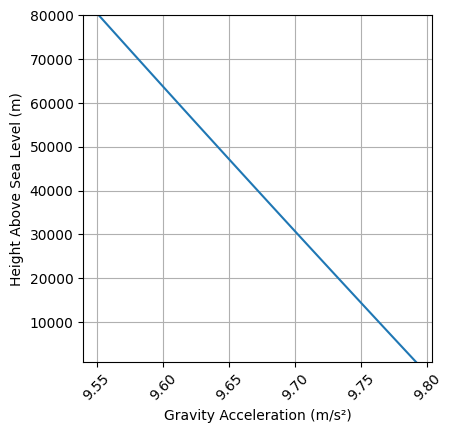



Atmospheric Model Plots


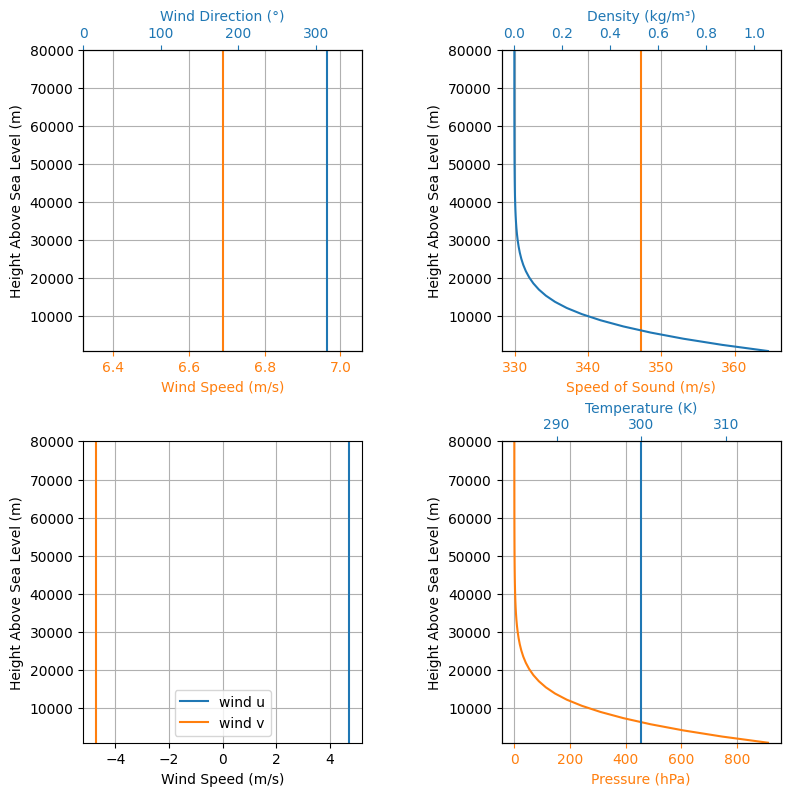

In [ ]:
env.all_info()

### Creating a Motor

A solid rocket motor is used in this case. To create a motor, the SolidMotor class is used and the required arguments are given.

The SolidMotor class requires the user to have a thrust curve ready. This can come either from a .eng file for a commercial motor, such as below, or a .csv file from a static test measurement.

Besides the thrust curve, other parameters such as grain properties and nozzle dimensions must also be given.

See [Solid Motor Class Usage Docs](https://docs.rocketpy.org/en/latest/user/motors/solidmotor.html) for more information.


In [ ]:
Mandioca = SolidMotor(
    thrust_source='./Aerodinamica/RocketPy.aero/Simulacoes/Pacifico/Data/Pacifico/mandioca_2024.csv',
    dry_mass=0,
    dry_inertia=(0, 0, 0),
    nozzle_radius=65/2000,
    grain_number=5,
    grain_density=1712.67478,
    grain_outer_radius=94/2000,
    grain_initial_inner_radius=32/2000,
    grain_initial_height=15.135/100,
    grain_separation=9/1000,
    grains_center_of_mass_position=0.532,
    center_of_dry_mass_position=0,
    nozzle_position=0,
    burn_time=4.38,
    throat_radius=11/1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

/usr/local/lib/python3.12/dist-packages/rocketpy/motors/motor.py:990: UserWarning: burn_time argument (0, 4.38) is out of thrust source time range. Using thrust_source boundary times instead: (0, 4.301000000000002) s.
If you want to change the burn out time of the curve please use the 'reshape_thrust_curve' argument.
  warnings.warn(


**Pay special attention to _position_ related parameters:**
More details on [Positions and Coordinate Systems](https://docs.rocketpy.org/en/latest/user/positions.html)


To see what our thrust curve looks like, along with other import properties, we invoke the info method yet again. You may try the all_info method if you want more information all at once!


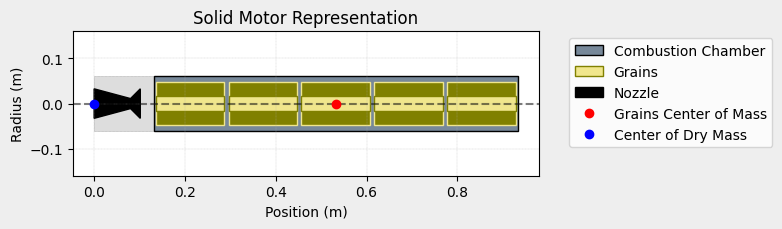

In [ ]:
Mandioca.draw()

Nozzle Details
Nozzle Radius: 0.0325 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.009 m
Grain Density: 1712.67478 kg/m3
Grain Outer Radius: 0.047 m
Grain Inner Radius: 0.016 m
Grain Height: 0.15134999999999998 m
Grain Volume: 0.001 m3
Grain Mass: 1.590 kg

Motor Details
Total Burning Time: 4.38 s
Total Propellant Mass: 7.952 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 1346.813 m/s
Average Thrust: 2445.191 N
Maximum Thrust: 4882.47264443292 N at 1.9550000000000018 s after ignition.
Total Impulse: 10709.936 Ns



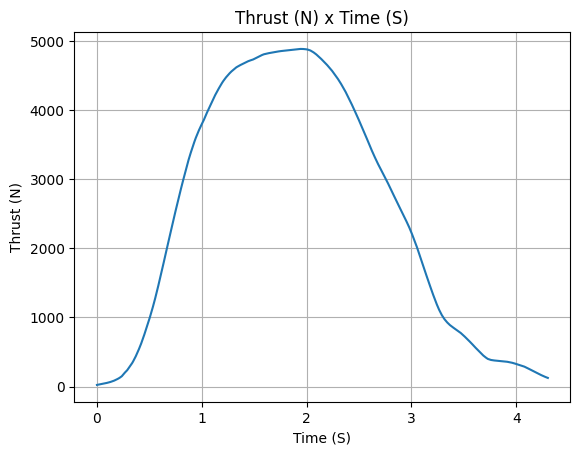

In [ ]:
Mandioca.info()

### Creating a Rocket


A rocket is composed of several components. Namely, we must have a motor (good thing we have the Pro75M1670 ready), a couple of aerodynamic surfaces (nose cone, fins and tail) and parachutes (if we are not launching a missile).

You can find more information about the `Rocket` class in the [Rocket Class Usage Docs](https://docs.rocketpy.org/en/latest/user/rocket.html).

Let's start by initializing our rocket, named Calisto, entering inertia properties, some dimensions and drag curves.

**Pay special attention to _position_ related parameters:**
More details on [Positions and Coordinate Systems](https://docs.rocketpy.org/en/latest/user/positions.html)


In [ ]:
#Cd_RASAero = "/gdrive/MyDrive/Pacifico I/DATA/SAC.csv"
Cd_RASAero = "./Aerodinamica/RocketPy.aero/Simulacoes/Data/CD_RasaeroTF/Airbrake0.csv"
Odisseia = Rocket(
    radius= 0.0817,
    mass=26.993,
    inertia=(12.622, 12.622, 0.137),
    power_off_drag= Cd_RASAero,
    power_on_drag= Cd_RASAero,
    center_of_mass_without_motor=1.677,
    coordinate_system_orientation='nose_to_tail',
    )


rail_buttons = Odisseia.set_rail_buttons(
    upper_button_position=1.837,
    lower_button_position=2.65,
    angular_position=45,
)

To add the motor to our rocket we need only inform what motor we are adding (Pro75M1670) and inform the position, in meters, of the motor's nozzle exit area relative to the previously defined coordinate system.


In [ ]:
Odisseia.add_motor(Mandioca, position=2.717)

#### Adding Aerodynamic Surfaces


Now we define the aerodynamic surfaces. They are really straight forward with special attention needed only for the position values. Here is a quick guide:

- The positions given **must** be relative to the same coordinate system as the rockets;
- Position of the Nosecone refers to the tip of the nose;
- Position of fins refers to the point belonging to the root chord which is highest in the rocket coordinate system;
- Position of the tail the point belonging to the tail which is highest in the rocket coordinate system.

See more details in [Positions and Coordinate Systems](https://docs.rocketpy.org/en/latest/user/positions.html)


In [ ]:
NACA0012_TRUNCADO =Function([[0,0.0002],[2,0.3320],[4,0.6335],[6,0.6877]])

nose_cone = Odisseia.add_nose(
      length=0.588, kind="vonKarman", position=0
    )

fin_set = Odisseia.add_trapezoidal_fins(
    n=4,
    root_chord=0.19,
    tip_chord=0.16,
    span=0.19,
    position=2.443,
    cant_angle=0.5,
    airfoil=(NACA0012_TRUNCADO, "degrees"),
    sweep_length=0.03,
)

tail = Odisseia.add_tail(
    top_radius=0.0817, bottom_radius=0.0655, length=0.052, position=2.673
)



(2, 754)

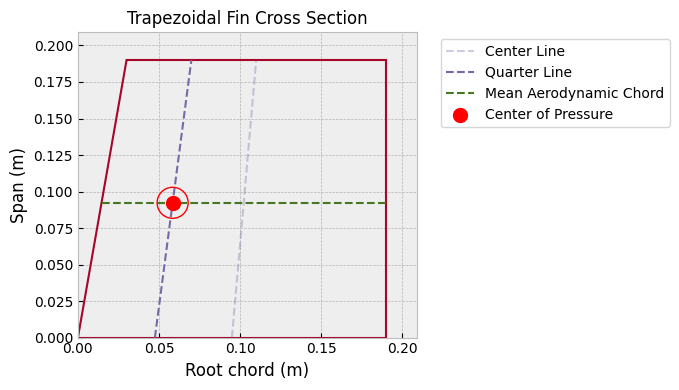

In [ ]:
fin_set.draw()

To see all information regarding the rocket we just defined we run:



Inertia Details

Rocket Mass: 26.993 kg (without motor)
Rocket Dry Mass: 26.993 kg (with unloaded motor)
Rocket Loaded Mass: 34.945 kg
Rocket Structural Mass Ratio: 0.772
Rocket Inertia (with unloaded motor) 11: 12.622 kg*m2
Rocket Inertia (with unloaded motor) 22: 12.622 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.137 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0817 m
Rocket Frontal Area: 0.020970 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.040 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.508 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.116 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 12.606/rad
Tail Lift Coefficient

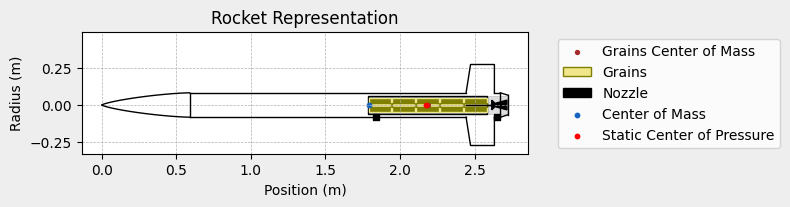


Mass Plots
----------------------------------------


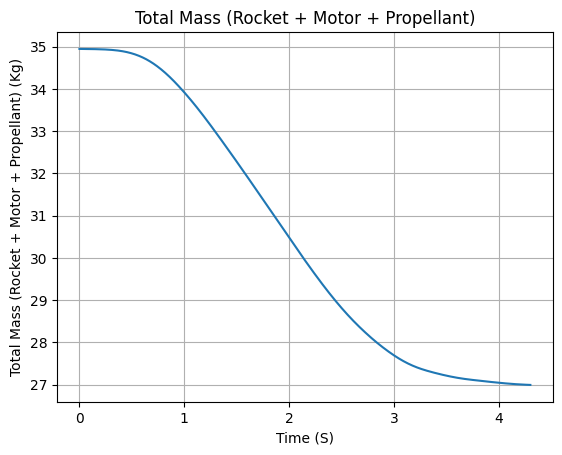

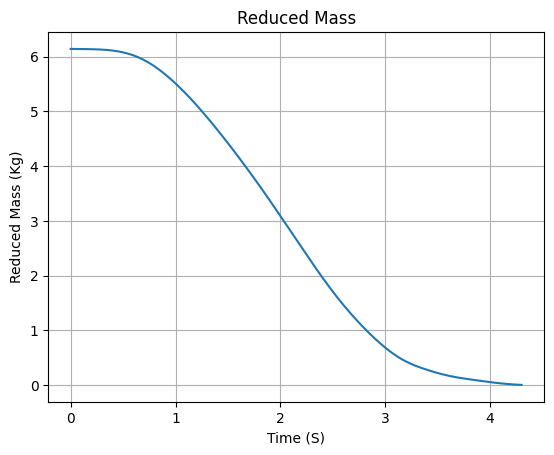


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


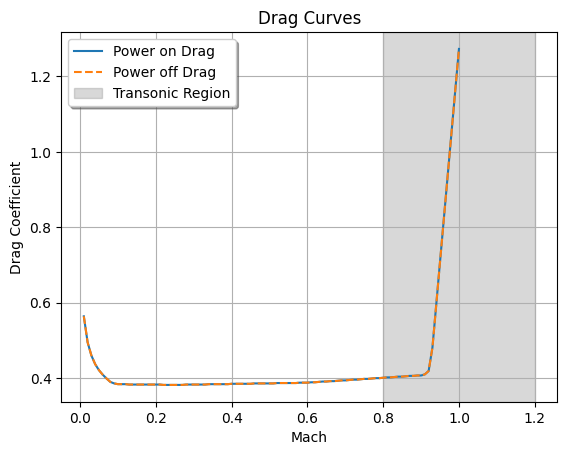


Stability Plots
--------------------


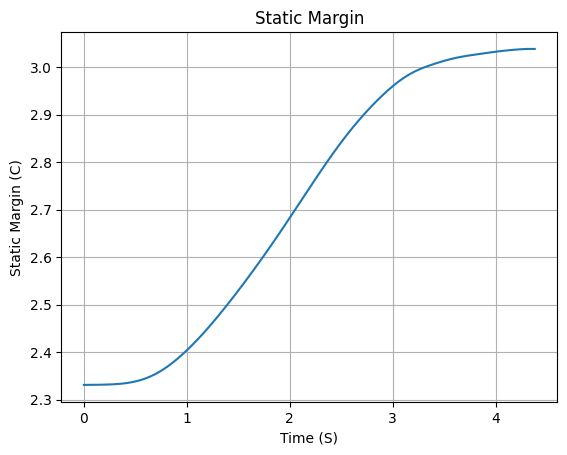

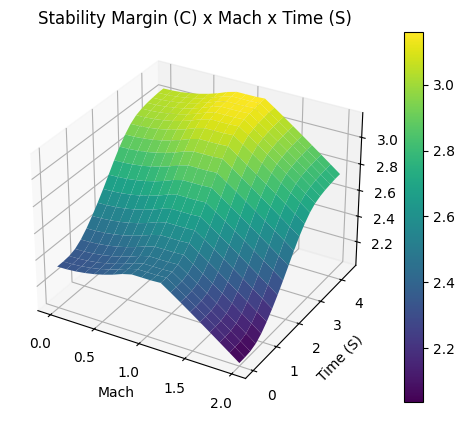


Thrust-to-Weight Plot
----------------------------------------


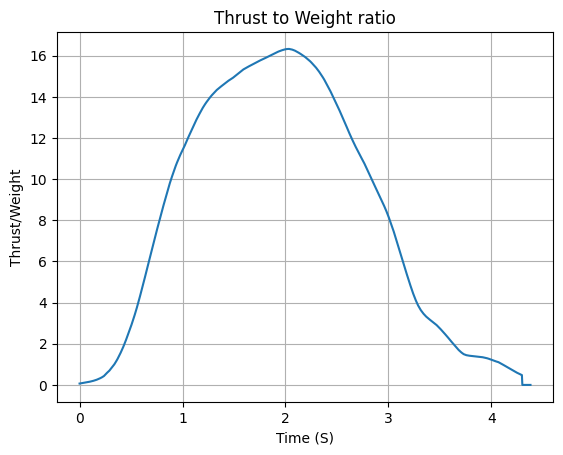

In [ ]:
Odisseia.all_info()

#### Adding Parachutes


Finally, we have parachutes! Calisto will have two parachutes, Drogue and Main. The Drogue parachute will open at apogee while the Main parachute will open at 800m above ground level

For more details see [Adding Parachutes](https://docs.rocketpy.org/en/latest/user/rocket.html#adding-parachutes)


In [ ]:
Main = Odisseia.add_parachute(
    "Main",
    cd_s=6.575,
    trigger=426, #426
    sampling_rate=50,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Odisseia.add_parachute(
    "Drogue",
    cd_s=1.215,
    trigger="apogee",
    sampling_rate=50,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Just be careful if you run this last cell multiple times! If you do so, your rocket will end up with lots of parachutes which activate together, which may cause problems during the flight simulation. We advise you to re-run all cells which define our rocket before running this, preventing unwanted old parachutes. Alternatively, you can run the following lines to remove parachutes.

```python
Calisto.parachutes.remove(Drogue)
Calisto.parachutes.remove(Main)
```


## Simulating a Flight

Simulating a flight trajectory is as simple as initializing a Flight class object givin the rocket and environnement set up above as inputs. The launch rail inclination and heading are also given here.


In [ ]:
test_flight = Flight(
    rocket=Odisseia, environment=env, rail_length=5.18, inclination=84, heading=0
)

In [ ]:
test_flight

## Analyzing the Results

RocketPy gives you many plots, thats for sure! They are divided into sections to keep them organized. Alternatively, see the Flight class documentation to see how to get plots for specific variables only, instead of all of them at once.



Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 884.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.923 | e1: 0.048 | e2: 0.020 | e3: 0.382
Euler Angles - Spin φ : 315.00° | Nutation θ: -6.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.331 c


Surface Wind Conditions

Frontal Surface Wind Speed: -4.73 m/s
Lateral Surface Wind Speed: -4.73 m/s


Launch Rail

Launch Rail Length: 5.18 m
Launch Rail Inclination: 84.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.915 s
Rail Departure Velocity: 24.317 m/s
Rail Departure Stability Margin: 2.388 c
Rail Departure Angle of Attack: 15.049°
Rail Departure Thrust-Weight Ratio: 10.377
Rail Departure Reynolds Number: 2.406e+05


Burn out State

Burn out time: 4.380 s
Altitude at burn out: 1591.012 m (ASL) | 707.012 m (AGL)
Rocket speed at burn out: 280.300 m/s
Freestream v

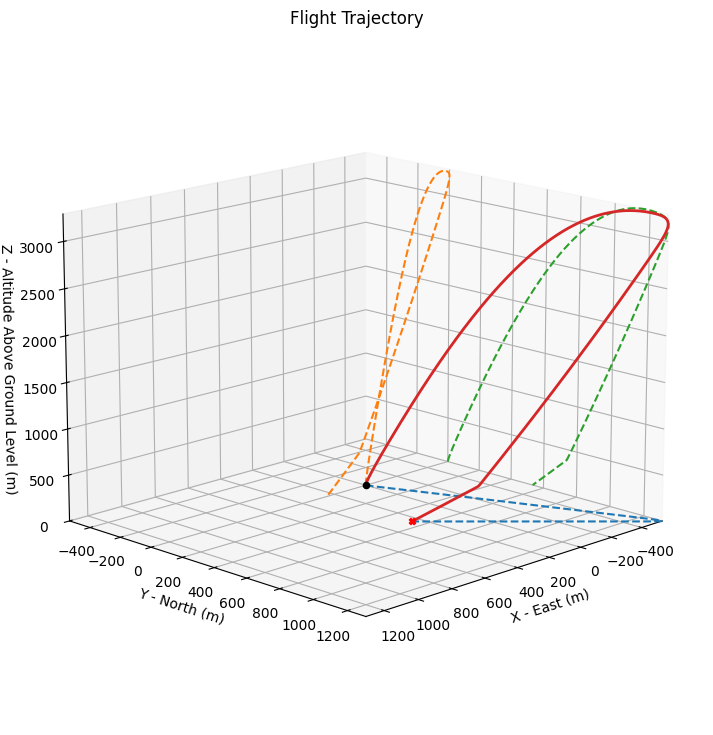



Trajectory Kinematic Plots



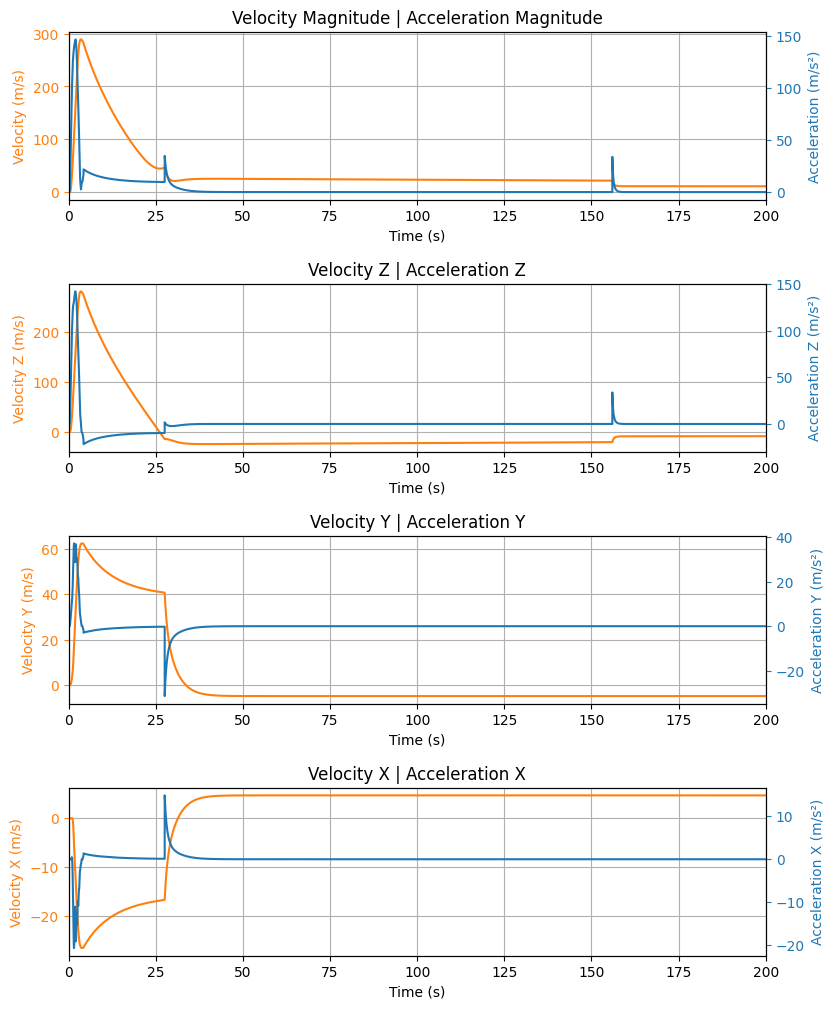



Angular Position Plots



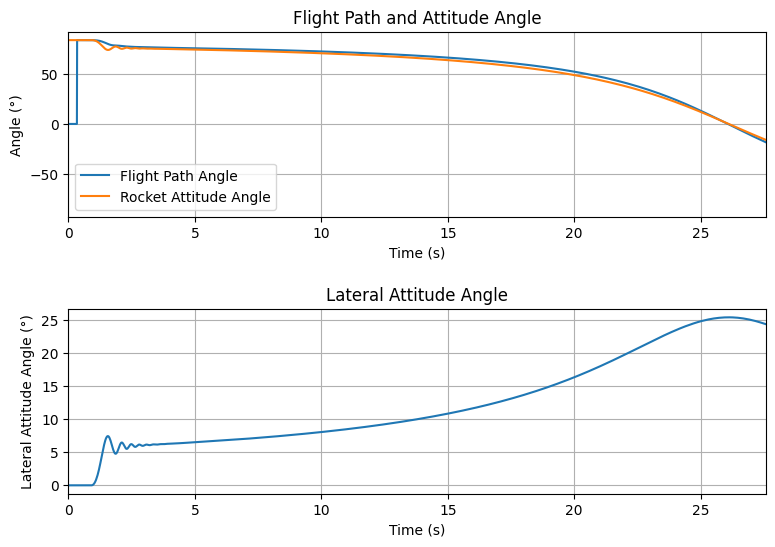



Path, Attitude and Lateral Attitude Angle plots



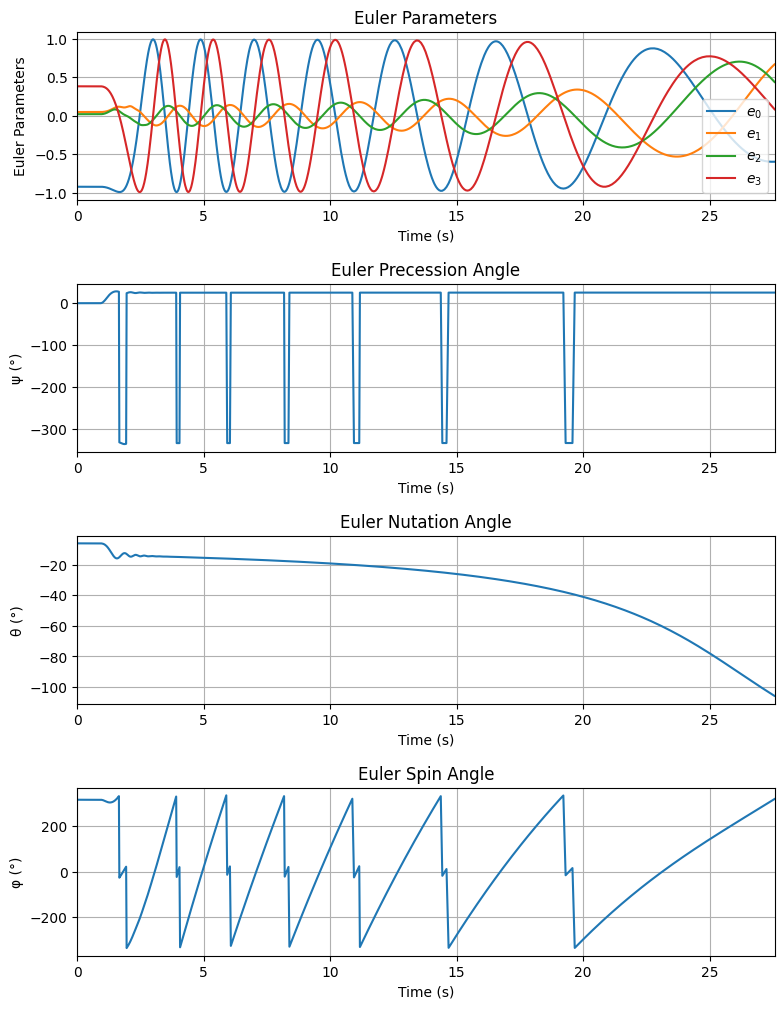



Trajectory Angular Velocity and Acceleration Plots



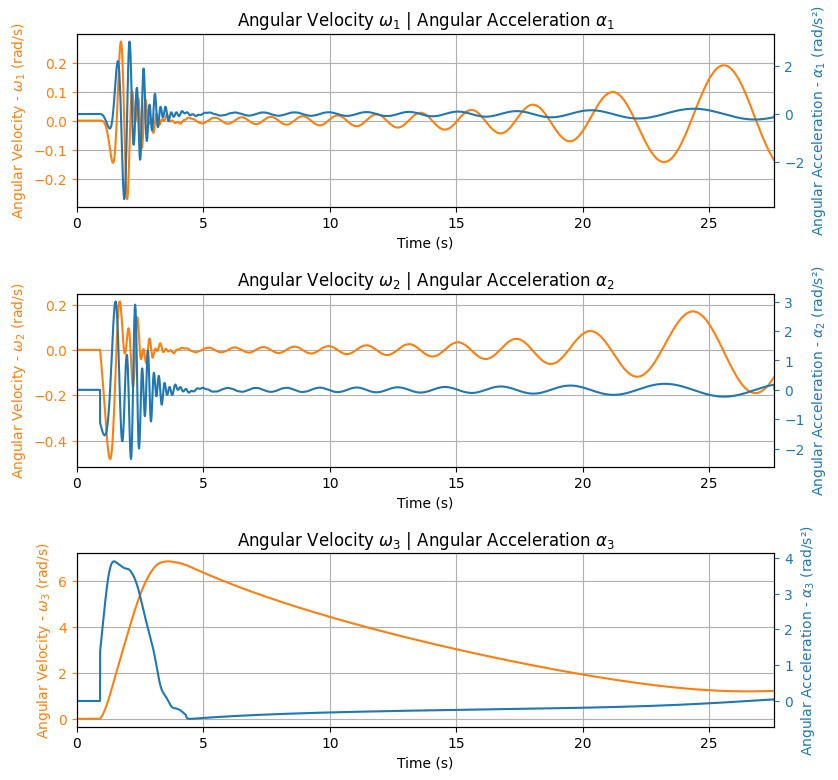



Aerodynamic Forces Plots



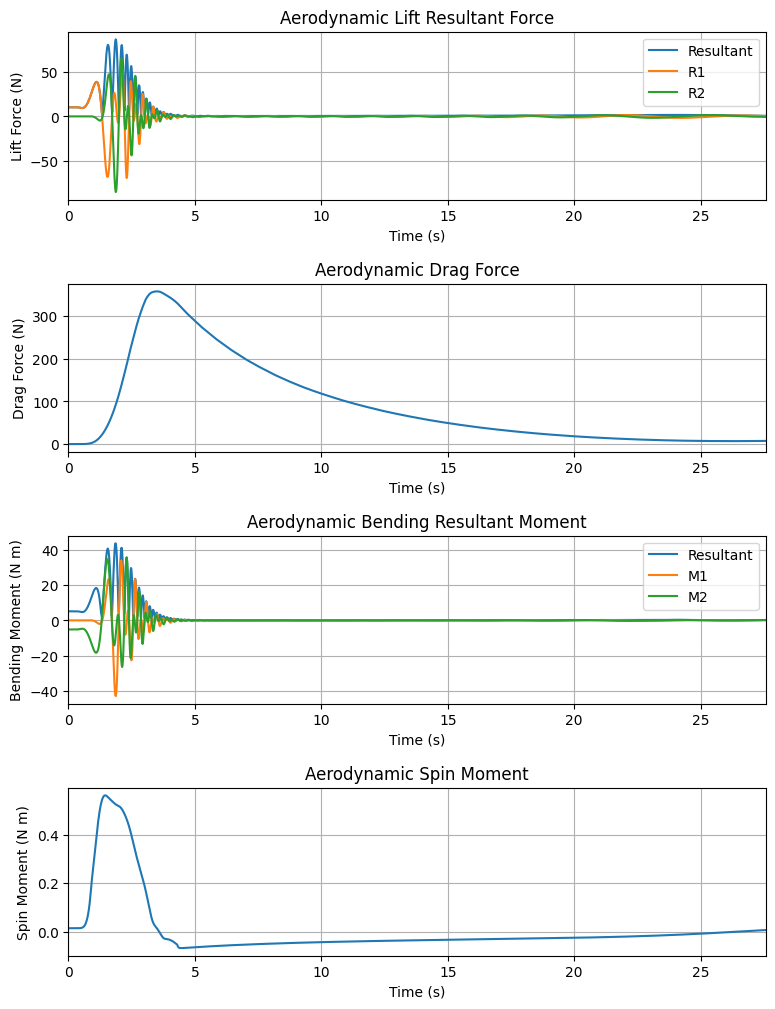



Rail Buttons Forces Plots



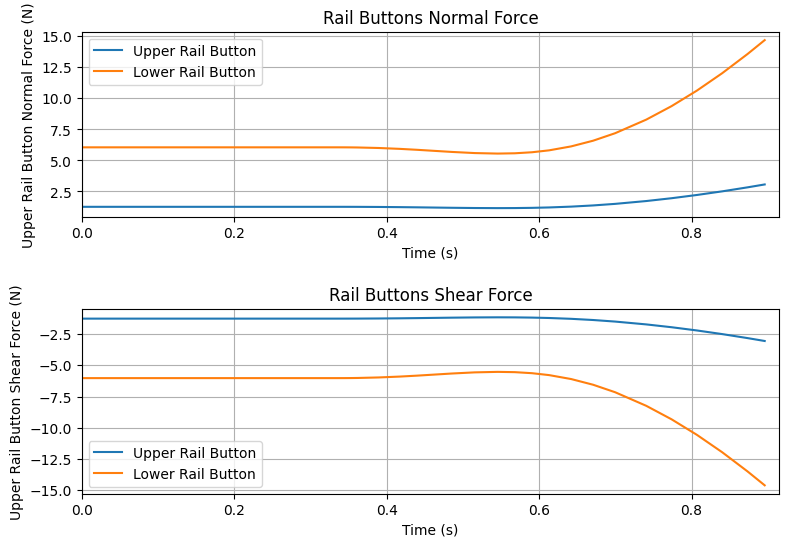



Trajectory Energy Plots



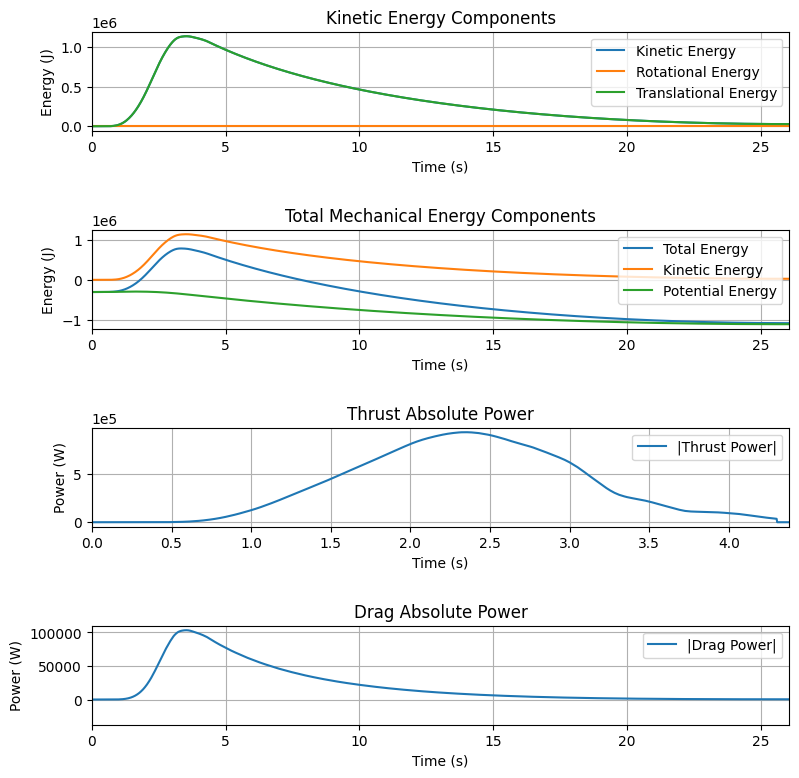



Trajectory Fluid Mechanics Plots



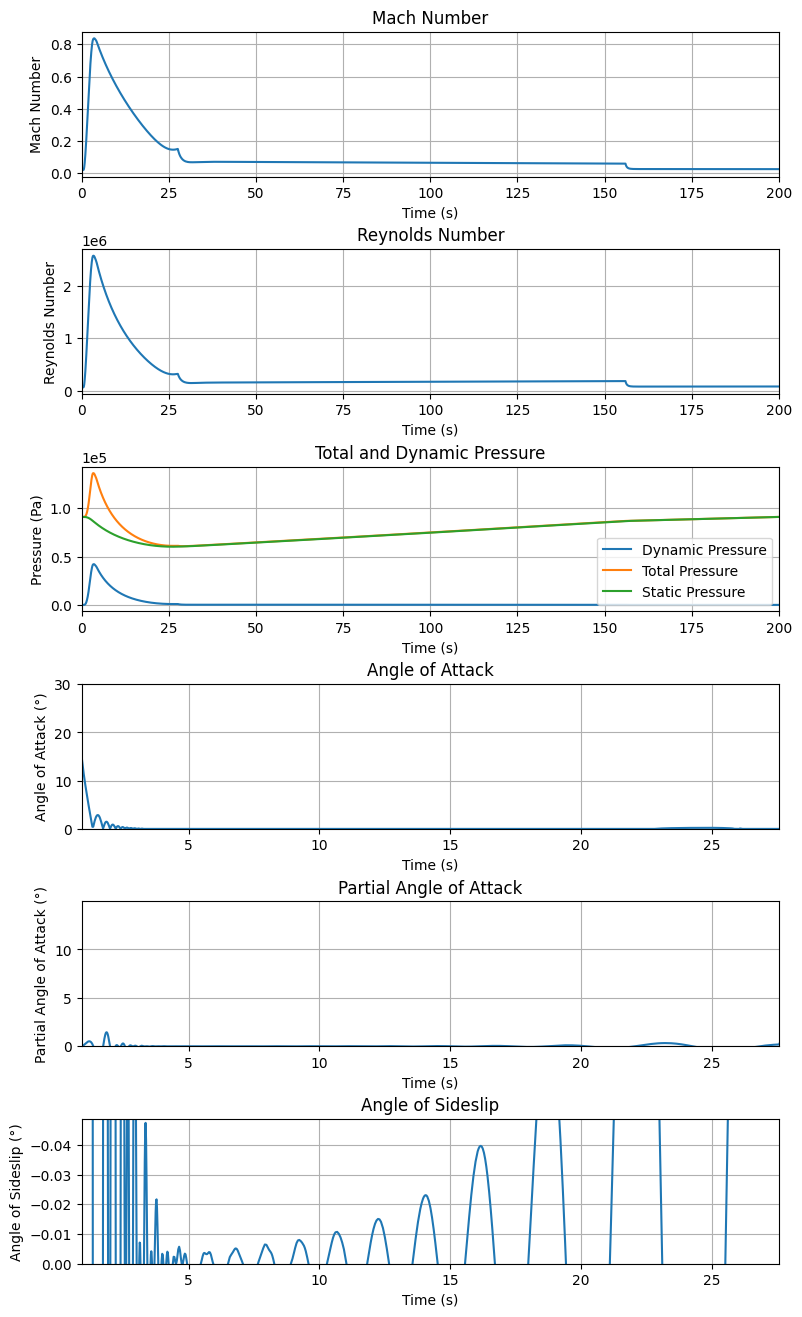



Trajectory Stability and Control Plots



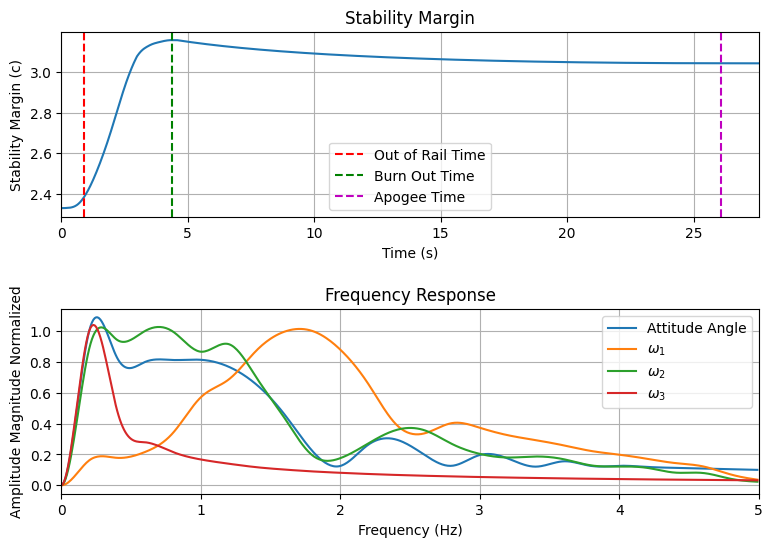



Rocket and Parachute Pressure Plots



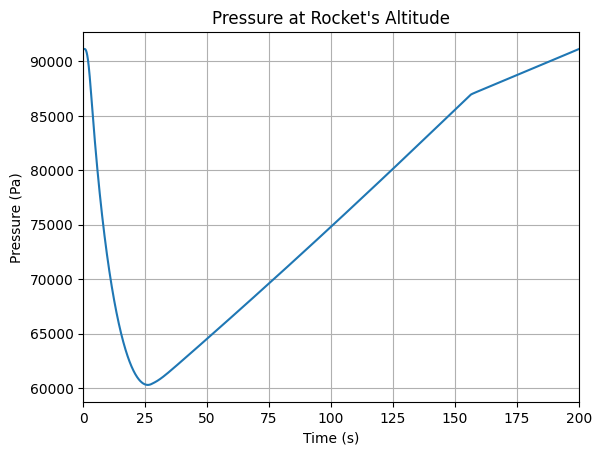


Parachute:  Main


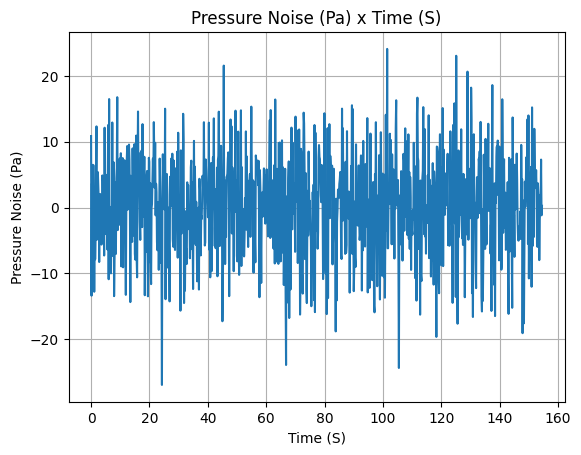

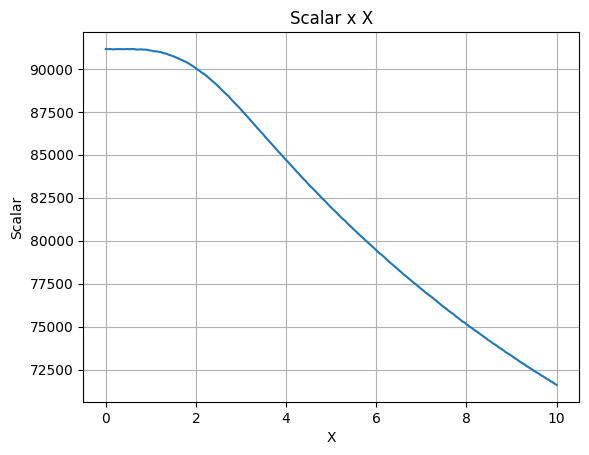

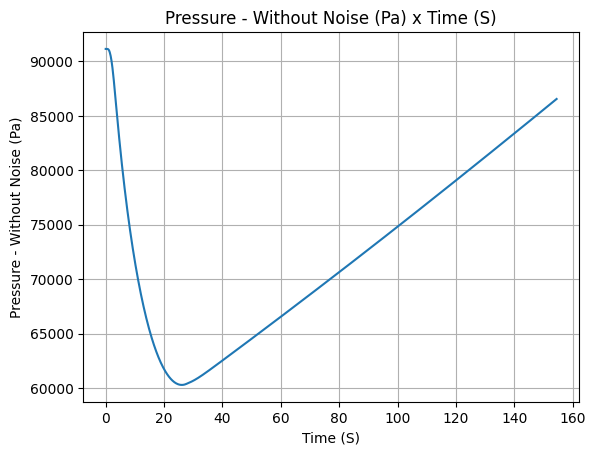


Parachute:  Drogue


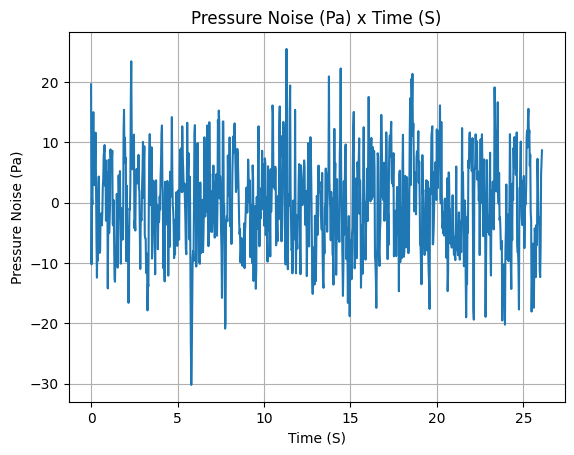

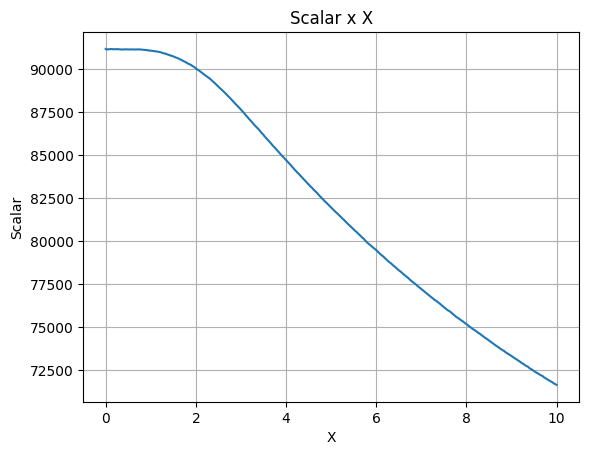

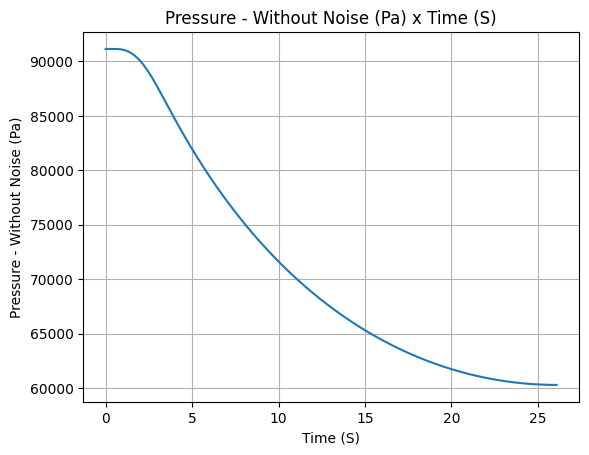

In [ ]:
test_flight.all_info()